In [1]:
%cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [2]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from itertools import combinations
from collections import defaultdict
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import community
import warnings
warnings.filterwarnings('ignore')


In [3]:
recommended = defaultdict(int)

In [4]:
all_books = ["book1.csv","book2.csv","book3.csv","book4.csv","book5.csv"]

In [5]:
li = []
for f in all_books:
  tmp = pd.read_csv(f)
  li.append(tmp)

In [6]:
books = pd.concat(li,axis=0,ignore_index=True)
books = books[['Source','Target']]

In [7]:
books.drop_duplicates(subset=['Source','Target'],inplace=True)
G = nx.from_pandas_edgelist(books, source='Source',target='Target')

In [8]:
print("\nAll of the relations")
print(books)


All of the relations
                               Source              Target
0                      Addam-Marbrand     Jaime-Lannister
1                      Addam-Marbrand     Tywin-Lannister
2                   Aegon-I-Targaryen  Daenerys-Targaryen
3                   Aegon-I-Targaryen        Eddard-Stark
4     Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne
...                               ...                 ...
3903                 Tyrion-Lannister    Yezzan-zo-Qaggaz
3904                 Tyrion-Lannister              Ysilla
3905                  Tywin-Lannister      Wylis-Manderly
3906                Victarion-Greyjoy               Wulfe
3908                           Yandry              Ysilla

[2823 rows x 2 columns]


In [9]:
print("Total number of characters in the books: ",len(G.nodes()))

Total number of characters in the books:  796


In [10]:
print("\nTotal number of interactions in all the books are: ",len(G.edges()))


Total number of interactions in all the books are:  2823


In [11]:
print("\nAverage of the shortest path is ",nx.average_shortest_path_length(G))


Average of the shortest path is  3.416225783003066


In [12]:
print("\nDiameter of entire network: ",nx.diameter(G))


Diameter of entire network:  9


In [13]:
print("\nDensity of the network: ",nx.density(G))


Density of the network:  0.008921968332227173


In [14]:
print("\nAverage clustering of the network: ",nx.average_clustering(G))


Average clustering of the network:  0.4858622073350485


In [15]:
print("Transitivity of entire network: ",nx.transitivity(G))

Transitivity of entire network:  0.2090366938564282


In [16]:
between_centrality = nx.betweenness_centrality(G)

In [17]:
degree_centrality = nx.degree_centrality(G)

In [18]:
page_rank = nx.pagerank(G)

In [19]:
clossness_centrality = nx.closeness_centrality(G)

In [20]:
print(sorted(between_centrality.items(),key=lambda x:x[1],reverse=True)[0:10])

[('Jon-Snow', 0.19211961968354493), ('Tyrion-Lannister', 0.16219109611159815), ('Daenerys-Targaryen', 0.11841801916269228), ('Theon-Greyjoy', 0.11128331813470259), ('Stannis-Baratheon', 0.11013955266679568), ('Jaime-Lannister', 0.10083800602581651), ('Cersei-Lannister', 0.0887042665586028), ('Arya-Stark', 0.08724236063571156), ('Eddard-Stark', 0.07873239257251853), ('Robert-Baratheon', 0.07822769060383253)]


In [21]:
print(sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)[0:10])

[('Tyrion-Lannister', 0.15345911949685534), ('Jon-Snow', 0.14339622641509434), ('Jaime-Lannister', 0.1270440251572327), ('Cersei-Lannister', 0.1220125786163522), ('Stannis-Baratheon', 0.11194968553459118), ('Arya-Stark', 0.10566037735849056), ('Catelyn-Stark', 0.09433962264150943), ('Sansa-Stark', 0.09433962264150943), ('Eddard-Stark', 0.0930817610062893), ('Robb-Stark', 0.0930817610062893)]


In [22]:
print(sorted(page_rank.items(),key=lambda x:x[1],reverse=True)[0:10])

[('Jon-Snow', 0.018999569248566855), ('Tyrion-Lannister', 0.01834123261931105), ('Jaime-Lannister', 0.015437447356269758), ('Stannis-Baratheon', 0.013648810781186755), ('Arya-Stark', 0.01343205011523126), ('Cersei-Lannister', 0.013334880500361591), ('Daenerys-Targaryen', 0.013061039250814909), ('Theon-Greyjoy', 0.012059616783844774), ('Eddard-Stark', 0.011476379237586544), ('Catelyn-Stark', 0.011173248389900785)]


In [23]:
print(sorted(clossness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10])

[('Tyrion-Lannister', 0.4763331336129419), ('Robert-Baratheon', 0.4592720970537262), ('Eddard-Stark', 0.455848623853211), ('Cersei-Lannister', 0.45454545454545453), ('Jaime-Lannister', 0.4519613416714042), ('Jon-Snow', 0.44537815126050423), ('Stannis-Baratheon', 0.4446308724832215), ('Robb-Stark', 0.4441340782122905), ('Joffrey-Baratheon', 0.4339519650655022), ('Catelyn-Stark', 0.4334787350054526)]


In [24]:
G_books = []
for book_name in all_books:
  book = pd.read_csv(book_name)
  G_book = nx.Graph()
  for _,edge in book.iterrows():
    G_book.add_edge(edge['Source'],edge['Target'],weight=edge['weight'])
  G_books.append(G_book)

In [25]:
evol = [nx.degree_centrality(book) for book in G_books]

In [26]:
degree_evol_df= pd.DataFrame.from_records(evol)

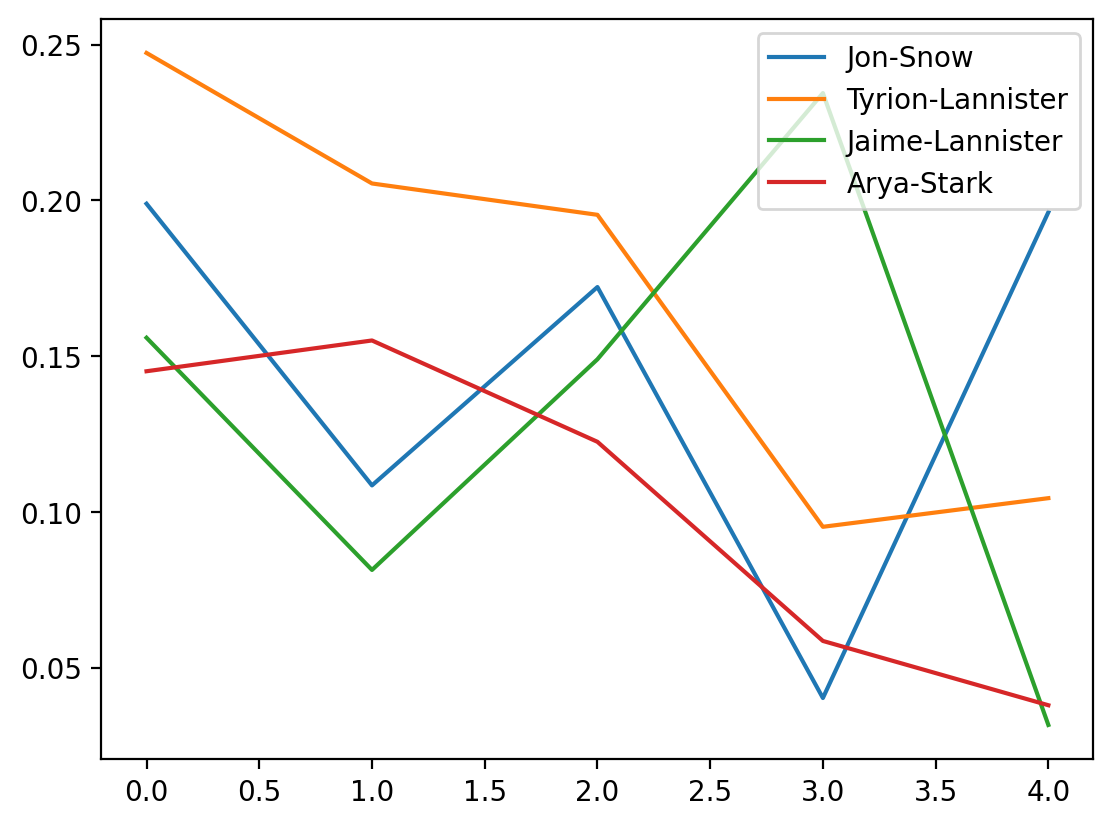

In [27]:
degree_evol_df[['Jon-Snow','Tyrion-Lannister','Jaime-Lannister','Arya-Stark']].plot()
plt.show()

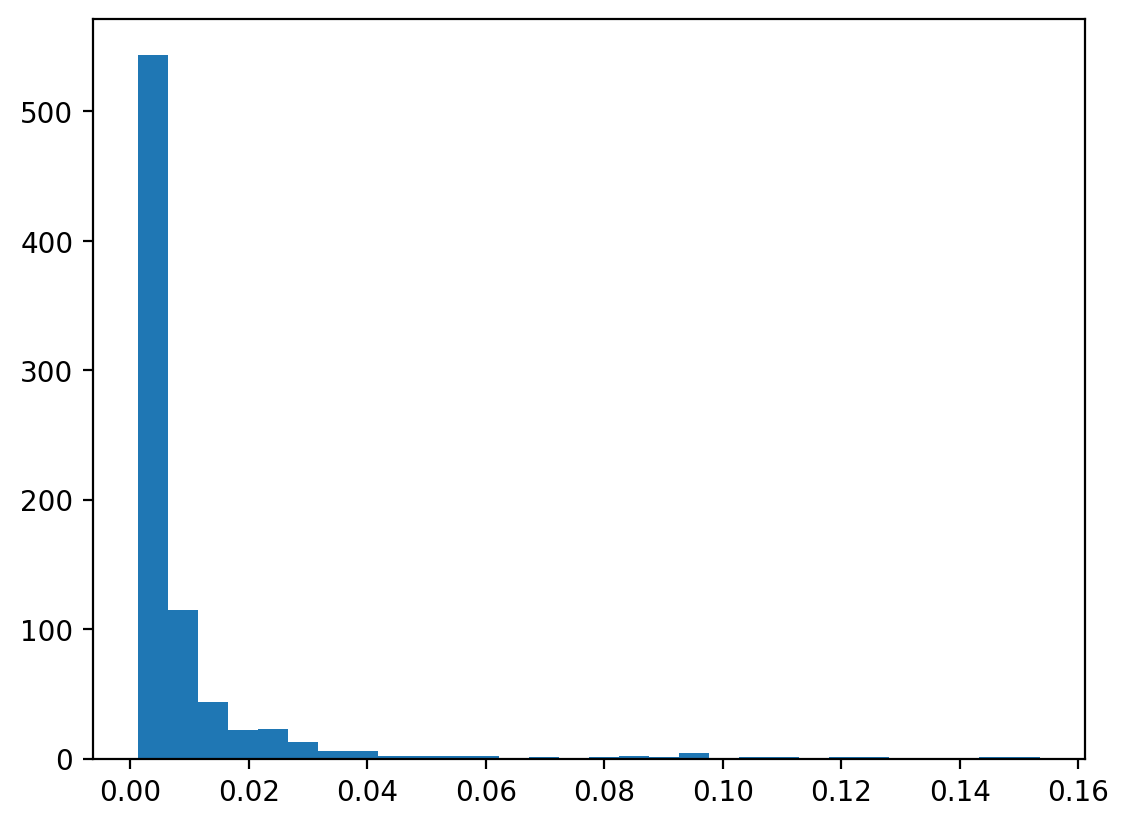

In [28]:
plt.hist(degree_centrality.values(),bins=30)
plt.show()